7
      question          worker  answer
1181         1    AKBP92VUQ7G3       0
1184         1   AD317NO9623GZ       0
1180         1   ATQWZNGQCN1RA       0
1176         1  A2V3P1XE33NYC3       2
1177         1  A2UFD1I8ZO1V4G       2
...        ...             ...     ...
1841       584  A3E157ZN8XPUKJ       1
1847       584  A2UFD1I8ZO1V4G       1
1845       584  A2H321P1NSEW35       1
1844       584   AD317NO9623GZ       1
1846       584  A3NU1SQPI1NXY4       1

[4088 rows x 3 columns]
27 & 584 & 4088 & 151.41$\pm$352.26 & 7.0$\pm$0.0 & 856
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.9767123287671233 1.0222602739726028
t-test Ttest_relResult(statistic=-5.0884476694207486, pvalue=3.8387867858392004e-07)
z-score 0.09418207728045215
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.9767123287671233 1.0017123287671232
t-test Ttest_relResult(statistic=-2.942721368790143, pvalue=0.003279045532677646)
z-score 0.054466829448946895
baseline bel

100%|██████████| 584/584 [00:02<00:00, 279.09it/s]


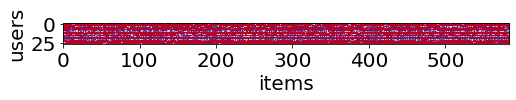

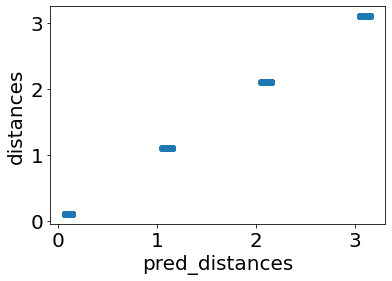

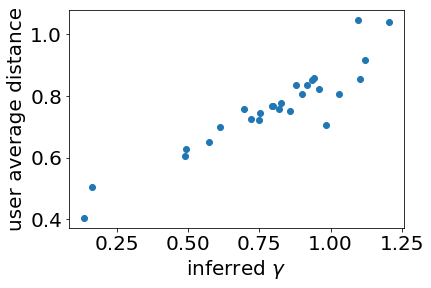

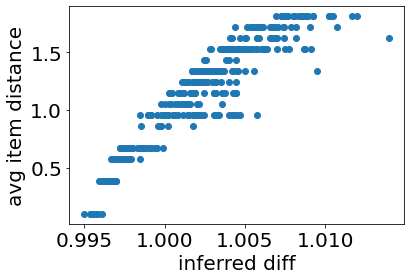

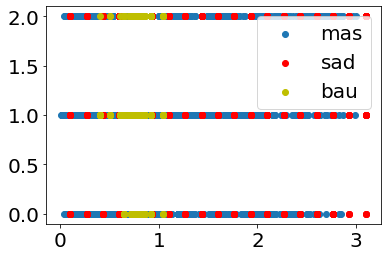

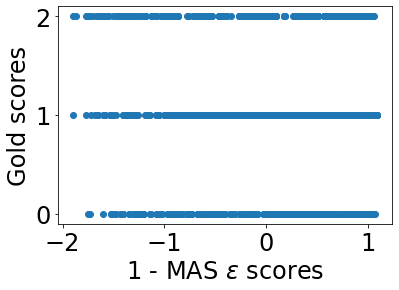

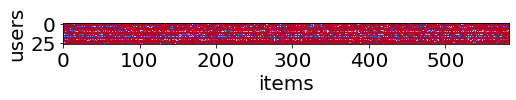

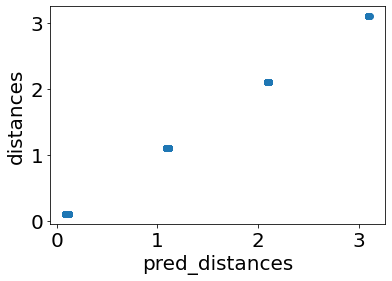

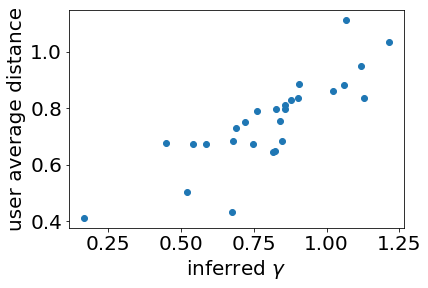

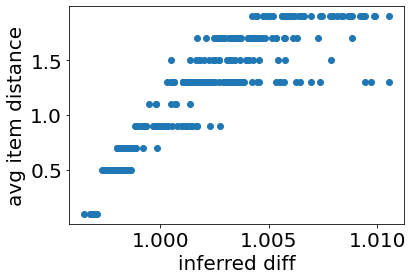

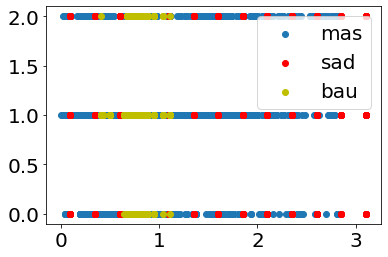

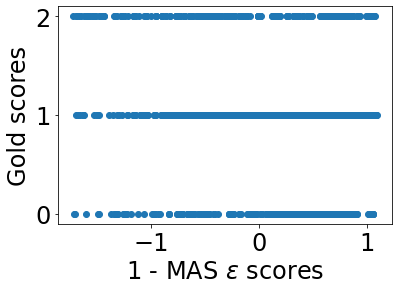

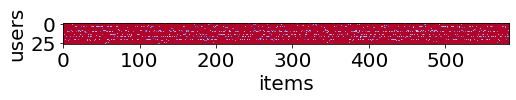

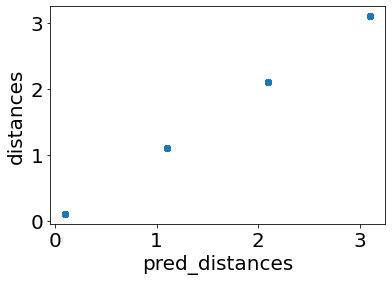

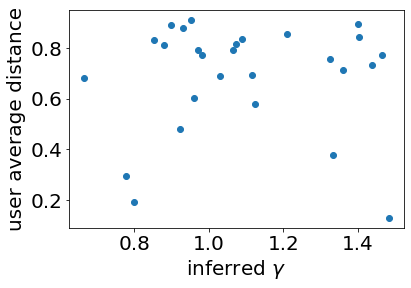

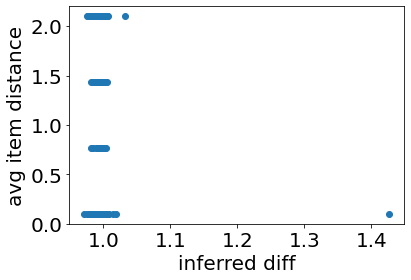

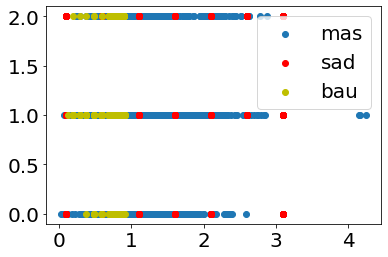

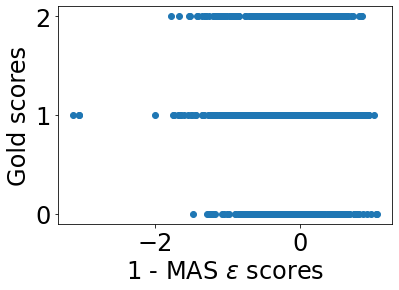

In [31]:
import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score

input_df = pd.read_csv("answer_face.csv", sep=",")
truth_df = pd.read_csv("truth_face.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
accSAD = []
accBAU = []
accMAS = []
w_f1_SAD = []
w_f1_BAU = []
w_f1_MAS = []
m_f1_SAD = []
m_f1_BAU = []
m_f1_MAS = []



def grapher():


    for i in range(3):
        dataRed.append(int((minSamples)-(2*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples)-(2*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        movie_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        movie_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        movie_exp.describe_data()

        movie_exp.train()

        movie_exp.test(debug=True)
        _ = movie_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        w_f1_MAS.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), average='weighted'))
        w_f1_BAU.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), average='weighted'))
        w_f1_SAD.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), average='weighted'))

        m_f1_MAS.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), average='macro'))
        m_f1_BAU.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), average='macro'))
        m_f1_SAD.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), average='macro'))

        accMAS.append(100*accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), normalize=True))
        accBAU.append(100*accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), normalize=True))
        accSAD.append(100*accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), normalize=True))

    dataRed.append(1)
    annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    accBAU.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accSAD.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accMAS.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    w_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    m_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))



grapher()

















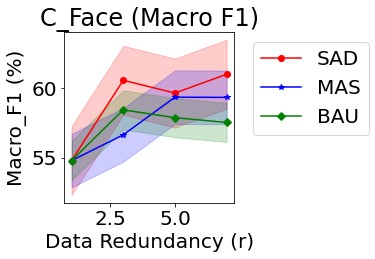

In [37]:
plt.plot(np.array(dataRed),np.array(m_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(m_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(m_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(m_f1_SAD-np.std(m_f1_SAD)),np.array(m_f1_SAD+np.std(m_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(m_f1_MAS-np.std(m_f1_MAS)),np.array(m_f1_MAS+np.std(m_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(m_f1_BAU-np.std(m_f1_BAU)),np.array(m_f1_BAU+np.std(m_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Face (Macro F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Macro_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Face(Macro_F1).png')
plt.show()

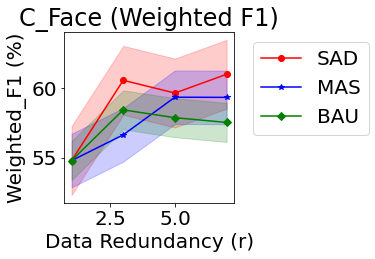

In [39]:
plt.plot(np.array(dataRed),np.array(w_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(w_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(w_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(w_f1_SAD-np.std(w_f1_SAD)),np.array(w_f1_SAD+np.std(w_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(w_f1_MAS-np.std(w_f1_MAS)),np.array(w_f1_MAS+np.std(w_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(w_f1_BAU-np.std(w_f1_BAU)),np.array(w_f1_BAU+np.std(w_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Face (Weighted F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Weighted_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Face(Weighted_F1).png')
plt.show()


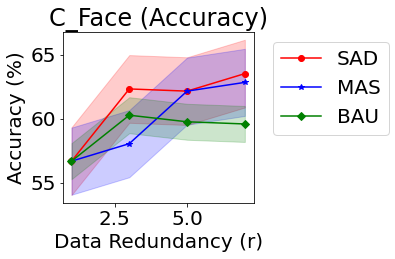

In [38]:
plt.plot(np.array(dataRed),np.array(accSAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(accMAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(accBAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(accSAD-np.std(accSAD)),np.array(accSAD+np.std(accSAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(accMAS-np.std(accMAS)),np.array(accMAS+np.std(accMAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(accBAU-np.std(accBAU)),np.array(accBAU+np.std(accBAU)),alpha=0.2,color='g')


plt.title("C_Face (Accuracy)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Face(Accuracy).png')
plt.show()






In [35]:
print(dataRed)
print(w_f1_SAD)
print(m_f1_SAD)

[7, 5, 3, 1]
[61.02429766081639, 59.6656658855901, 60.58637340476773, 54.79415831345646]
[61.02429766081639, 59.6656658855901, 60.586373404767734, 54.79415831345646]
